In [42]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import  load_house_data, run_gradient_descent 
plt.style.use('./deeplearning.mplstyle')

# load the dataset
x_train,y_train=load_house_data()
# x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
# y_train = np.array([460, 232, 178])

def compute_prediction(x,w,b):
    m=x.shape[0]
    prediction=np.zeros(m)
    # print(f'{np.dot(w,x[0])}')
    for i in range(m):
        prediction[i]=np.dot(w,x[i]) + b

    return prediction

def compute_cost(x,y,w,b):
    predicted_output=compute_prediction(x,w,b)
    m=x.shape[0]
    cost=0
    
    for i in range(m):
        cost=cost + (predicted_output[i]-y[i])**2

    total_cost=cost/(2*m)

    return total_cost

def compute_gradient_descent_derivatives(x,y,w,b):
    m=x.shape[0]
    n=x.shape[1]
    # print(f'{b}')
    predicted_output=compute_prediction(x,w,b)
    dj_dw=np.zeros(n)
    dj_db=0

    for i in range(m):
        for j in range(n):
            dj_dw[j]=dj_dw[j] + (predicted_output[i]-y[i]) * x[i][j]
        
        dj_db=dj_db + (predicted_output[i]-y[i])

    dj_dw=(dj_dw)/(m)
    dj_db=(dj_db)/(m)

    return dj_dw,dj_db

def computing_gradient_descent(x,y,a,iterations):
    b=0
    # print(f'{x}')
    n=x.shape[1]
    w=np.zeros(n)
    # print(f'{b}')
    for i in range(iterations):
        dj_dw,dj_db=compute_gradient_descent_derivatives(x,y,w,b)
        # print(f'{dj_dw}')
        for j in range(n):
            w[j]=w[j]-a*dj_dw[j]
        b=b-a*dj_db
        # print(f'{w}')
        # print(f'{b}')

    return w,b
        
# Function to Normalize features so I can easily find parameters w&b to make predictions
def normalize_features(x):
    x_mean=np.mean(x,axis=0)
    x_std=np.std(x,axis=0)
    x_norm=(x-x_mean)/x_std

    return x_norm,x_mean,x_std
    # return x_norm


In [43]:
# no feature engineering just using x
def linear_model_tester():
    w=np.array([10.,10.,10.,10.])
    b=786
    alpha = 1.0e-1
    iterations=1000
    b_init = 785.1811367994083
    w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
    x_norm,x_mean,x_std=normalize_features(x_train)
    # w,b=computing_gradient_descent(x_train,y_train,w,b,alpha,iterations)
    w,b=computing_gradient_descent(x_norm,y_train,alpha,iterations)
    # print(f'{y_train}')
    pre_opt=compute_prediction(x_norm,w,b)

    #predicting an output based on w & b we found
    x_ipt1=np.array([1200, 3, 1, 40])
    x_iptn1=(x_ipt1-x_mean)/x_std
    print(f'{(np.dot(w,x_iptn1) + b) * 1000:0.0f} dollars')
    
linear_model_tester()

318709 dollars


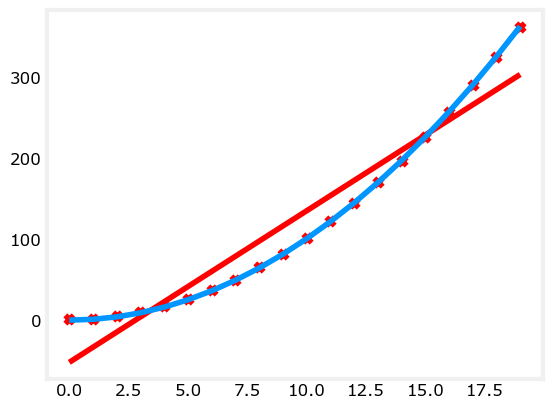

In [44]:
# feature engineering with using x2
def polynomial_model_tester_X2():
    x=np.arange(0,20,1)
    y=x**2 + 1
    iterations=1000
    X=x.reshape(-1,1)
    
    plt.scatter(x,y,c='r',marker='x')
    
    W,B=computing_gradient_descent(X,y,1e-2,1000)
    Y=compute_prediction(X,W,B)
    plt.plot(x,Y,c='r')

    X=X**2
    W,B=computing_gradient_descent(X,y,1e-5,1000)
    # print(f'x**2{z,k}')
    Y=compute_prediction(X,W,B)
    plt.plot(x,Y)

polynomial_model_tester_X2()

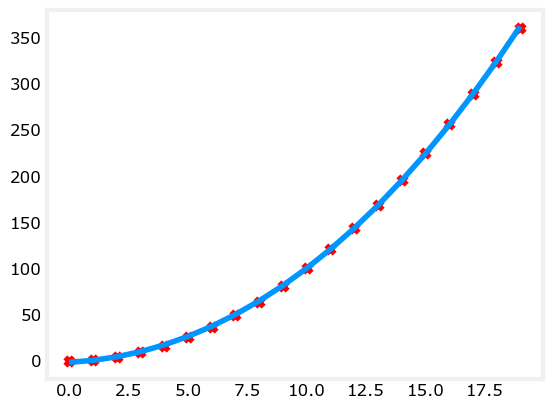

In [45]:
# feature engineering with using xx2x3
def polynomial_model_tester_XX2X3():
    x=np.arange(0,20,1)
    y=x**2 
    
    plt.scatter(x,y,c='r',marker='x')

    X=np.c_[x,x**2,x**3]
    X,x_mean,x_std=normalize_features(X)
    # print(f'{X}')

    W,B=computing_gradient_descent(X,y,a=1e-1,iterations=10000)
    Y=compute_prediction(X,W,B)
    plt.plot(x,Y)
    
polynomial_model_tester_XX2X3()

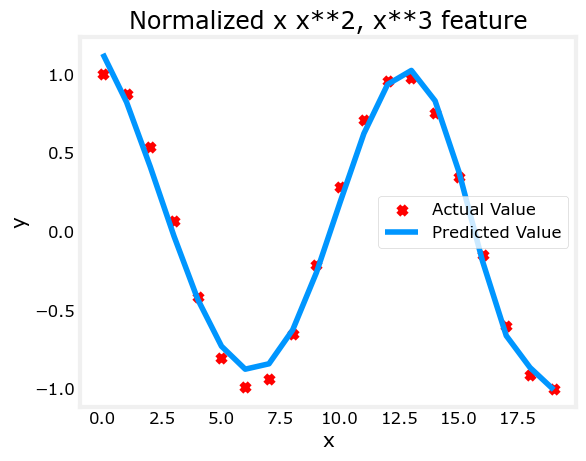

In [48]:
def complex_features():
    x = np.arange(0,20,1)
    y = np.cos(x/2)

    X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
    X,x_mean,x_std = normalize_features(X) 

    model_w,model_b = computing_gradient_descent(X, y, a=1e-1, iterations=1000000)

    plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
    plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

complex_features()